## create Date


In [ ]:
#data 물리식에 넣기
#물리식에 집어 넣고
#csv file 만들기 - (x, y)
#lstm을 기반으로 한 모델에 넣기
#비교

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt


def mph2mps(mph):
  # convert mph to meter per second
  return (mph * 5280 * .3048 / 60 / 60)

def yard2meter(yard):
  # convert yard to meter
  return yard / 1.094

# index: [ball_speed, launch_angle, spin rate, max_height, Carry]
pga_tour_average = {
     1:[mph2mps(167), 10.9, 2686, yard2meter(32), yard2meter(275)],
     2:[mph2mps(158), 9.2, 3655, yard2meter(30), yard2meter(243)],
     3:[mph2mps(152), 9.4, 4350, yard2meter(31), yard2meter(230)],
     4:[mph2mps(146), 10.2, 4437, yard2meter(29), yard2meter(225)],
     5:[mph2mps(142), 10.4, 4630, yard2meter(27), yard2meter(212)],
     6:[mph2mps(137), 11.0, 4836, yard2meter(28), yard2meter(203)],
     7:[mph2mps(132), 12.1, 5361, yard2meter(31), yard2meter(194)],
     8:[mph2mps(127), 14.1, 6231, yard2meter(30), yard2meter(183)],
     9:[mph2mps(120), 16.3, 7097, yard2meter(32), yard2meter(172)],
     10:[mph2mps(115), 18.1, 7998, yard2meter(31), yard2meter(160)],
     11:[mph2mps(109), 20.4, 7998, yard2meter(30), yard2meter(148)],
     12:[mph2mps(102), 24.2, 9304, yard2meter(29), yard2meter(136)]

}


cl = {13.7: [-0.06268752565831914,0.055642777549703815,0.34289220573573387,0.3912245616092897,0.40737082869039926,0.4861527183156411]
     ,21.6: [0.11171661486129825, 0.1589027036537446, 0.3184203272535334, 0.36117969620550106, 0.38180898481027503,0.4529329658084568]
     ,29.9: [0.17064952202216876, 0.23448771333059615, 0.2906328074599729, 0.3311911324848981, 0.3474218520907863, 0.39066330420503176]
     ,38.4: [0.13164565128144956, 0.18782593396281733, 0.23167878716790796, 0.2767271714268958, 0.3074159873321211, 0.3483684241393465]
     ,46.9: [0.1667647058823527, 0.12731394053134704, 0.20291038648759585, 0.23234736965573854, 0.26519852208081623, 0.3106128672805114]
     ,55.2: [0.1162101929505599, 0.1455697613043222, 0.17845962113658997, 0.20681367661720707, 0.23408480441029833, 0.27395783238519716]
     ,63.1: [0.11398803589232298, 0.1400108498035304, 0.16513019764236692, 0.1890329012961115, 0.21630754794440193, 0.25287197231833886]
     ,71.9: [0.11619611752976344, 0.13446601372353506, 0.15290481496686392, 0.1756999589466891, 0.1963046155650694, 0.23286552108380731]
     ,80.2: [0.10731452700721356, 0.12563368717377266, 0.14624186264735206, 0.16458213594510585, 0.18408627059996463, 0.21619582429183026]
     ,89.1: [0.10955779719664527, 0.12563368717377266, 0.14402322444431392, 0.15457187261744154, 0.17186440677966086, 0.20286991965280599]}
cldf = pd.DataFrame(data=cl,index=[1011.55,1881.78,2799.63,3673.1,4603.46,6184.94])


cd = {13.7: [0.5283926090053684, 0.39232153720998514, 0.36138035297043397, 0.42054484067716585, 0.4004768655573524, 0.473749211429599, 0.51704056729298]
     ,21.6: [0.3287531384750698, 0.25231105572189483, 0.2701728602519771, 0.3565051964857509, 0.37547556590903014, 0.42817412758471945, 0.44884590759456]
     ,29.9: [0.2430412613754353, 0.24372916171980696, 0.26911150420594293, 0.30765162680844305, 0.3717865317093115, 0.3407635750023533, 0.387970736134859975]
     ,38.4: [0.24087134043620406, 0.23933873893367008, 0.250660432101454, 0.2696240574037101, 0.2995047286123549, 0.3305647779849409, 0.35644281336628586]
     ,45.9: [0.24957547163183835, 0.2430412613754353, 0.2350292455998122, 0.2665006863548166, 0.2800395093089944, 0.30453584289570074, 0.3347705804580663]
     ,55.2: [0.24575745611755, 0.2343615776185103, 0.24849051116222276, 0.2588789865834142, 0.2637785905068066, 0.2871663592003158, 0.314213656564067]
     ,63.1: [0.24259699240302862, 0.2517209451323603, 0.2484938832227344, 0.25778053787175204, 0.2670334719156535, 0.28282314526134167, 0.29465401956638104]
     ,71.9: [0.24304800549645855, 0.24365497638855121, 0.24632059022299152, 0.25561736105354405, 0.26485680685539886, 0.27739834291326354, 0.285974335809456]
     ,80.2: [0.23978637996658836, 0.23825715052456614, 0.2484938832227344, 0.2556106169325208, 0.26269363003719093, 0.2730652451558243, 0.285974335809456]
     ,88.9: [0.2408645963151808, 0.23053091687730326, 0.24957547163183835, 0.25670906564418294, 0.2605371973400062, 0.2676438148682578, 0.27512473111329977]}
cddf = pd.DataFrame(data=cd,index=[3.24,1031.94,1876.39,2803.78,3685.811,4617,6193])

def find_nearest(velocity,spin,data):
     LowSpin = 0
     HighSpin = 6200
     LowVel = 0
     HighVel = 90

     for values in data.index:
          if spin > values:
               LowSpin = values
          if spin < values and values < HighSpin:
               HighSpin = values

     for elements in data.columns:
          if velocity > elements:
               LowVel = elements
          if velocity < elements and elements < HighVel:
               HighVel = elements

     if HighSpin == 6200 and max(data.index) == 6184.94:
       HighSpin = 6184.94
     elif HighSpin == 6200 and max(data.index) == 6193:
       HighSpin = 6193
     #print(type(spin))

     if HighVel == 90 and max(data.columns) == 89.1:
       HighVel = 89.1
     elif HighVel == 90 and max(data.columns) == 88.9:
       HighVel = 88.9

     return LowSpin,HighSpin,LowVel,HighVel


def interpolate_cl(velocity, spin):
     y1,y2,x1,x2 = find_nearest(velocity,spin,cldf)
     f11 = cldf[x1][y1]
     f12 = cldf[x1][y2]
     f21 = cldf[x2][y1]
     f22 = cldf[x2][y2]

     return (1/((x2-x1)*(y2-y1)+1)) * (f11*(x2-velocity)*(y2-spin) + f21*(velocity-x1)*(y2-spin)
                         + f12*(x2-velocity)*(spin-y1) + f22*(velocity-x1)*(spin-y1))

def interpolate_cd(velocity, spin):
     y1,y2,x1,x2 = find_nearest(velocity,spin,cddf)
     f11 = cddf[x1][y1]
     f12 = cddf[x1][y2]
     f21 = cddf[x2][y1]
     f22 = cddf[x2][y2]
     #print(x2,x1,y1,y2,f11,f12,velocity,spin,f22,f21)
     return (1/((x2-x1)*(y2-y1)+1)) * (f11*(x2-velocity)*(y2-spin) + f21*(velocity-x1)*(y2-spin)
                         + f12*(x2-velocity)*(spin-y1) + f22*(velocity-x1)*(spin-y1))


def forceDrag(rho, v, C_D, area):
    '''define a function to calculate the force of drag on an object'''
    force = 0.5 * rho * v ** 2 * C_D * area
    return force

def forceLift(rho, v, C_l, area):
    '''define a function to calculate the force of drag on an object'''
    force = 0.5 * rho * v ** 2 * C_l * area
    return force

In [ ]:
def liftTrajectory(u, theta_deg, theta_xz, spin_axis, spin_RPM):
    '''define a function to find the path of a ball with drag and lift caused
    by its rotation and the Magnus effect'''

    '''initialise variables'''
    interval = 0.033
    g = - 9.81
    rho = 1.225
    area = 0.00138

    '''convert angles to radians'''
    theta_rad = np.radians(theta_deg)     #launch angle
    theta_rad_xz = np.radians(theta_xz)   #theta_xz(치는 방향) to radian(방향 각도)
    #theta_rad_xz = (-1) * np.radians(theta_xz)
    #theta_spin = np.radians(spin_axis)
    theta_spin = (-1) * np.radians(spin_axis)
    '''find the magnitude of the lift force'''
    lift_mag = 0.285 * (1-np.exp(-0.00026*spin_RPM))
    #lift_mag = (-1) *0.285 * (1-np.exp(-0.00026*spin_RPM))


    s_x = 0
    s_y = 0
    s_z = 0

    v_x = u * np.cos(theta_rad) * np.cos(theta_rad_xz)    #u는 모든 힘의 벡터 => x벡터의 길이만 뽑아낸거임
    v_y = u * np.sin(theta_rad)
    v_z = u * np.cos(theta_rad) * np.sin(theta_rad_xz)

    # coef 구하는 부분
    C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)  #스핀이랑 속도의 크기 벡터
    #C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
    C_D = interpolate_cd(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
    #print('ggg')
    '''mass in kg'''
    m = 0.045

    #가속도 구하는 부분  F = ma => a = F/m
    a_x = (-1) * forceDrag(rho, v_x, C_D, area) / m
    a_y = (-1) * forceDrag(rho, v_y, C_D, area) / m + g
    #a_z = (-1) * forceDrag(rho, v_z, C_D, area) / m
    a_z =  forceDrag(rho, v_z, C_D, area) / m


    '''intialise arrays'''
    x_array = np.array([0])
    y_array = np.array([0])
    z_array = np.array([0])
    t_array = np.array([0])

    count = 0
    #C_l = 0.25
    while s_y >= 0:

        #print(v_z, a_z)
        try:
            C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
            C_D = interpolate_cd(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
            #C_D = 1.5

        except:
            C_l = 0.3
            C_D = 0.3
        #print(C_l, C_D, lift_mag)

        count = count + 1
        time = count * interval     #몇 프레임으로 뽑을지

        '''find the next point's position '''
        s_x = s_x + v_x * interval + 0.5 * a_x * interval ** 2    #각 프레임에서의 위치
        s_y = s_y + v_y * interval + 0.5 * a_y * interval ** 2
        s_z = s_z + v_z * interval + 0.5 * a_z * interval ** 2

        #print(s_z)
        '''find the new velocity at the next point'''
        v_x = v_x + a_x * interval            #원래 속도에 가속도만큼 더해짐
        v_y = v_y + a_y * interval
        v_z = v_z + a_z * interval
        #print(v_z, a_z)
        #v_z = 0

        '''find the components of lift'''
        theta_i = np.arctan(v_y/v_x)          #그때 그때 v_x와 v_y가 이루는 각도
        theta_z = np.arctan(v_z/v_x)

        if theta_spin < 0:
          direction = -1
        else:
          direction = 1

        ###################
        l_x = (-1) * forceLift(rho, v_y, C_l, area)
        l_y = forceLift(rho, v_x, C_l, area) * np.cos(theta_spin)
        #l_z = (-1) * forceLift(rho, v_z, C_l, area)* np.cos(theta_spin) + l_y * np.sin(theta_spin)
        l_z = (-1) * forceLift(rho, v_z, C_l, area)* np.cos(theta_spin) + l_y * np.sin(theta_spin)

        d_x = (-1) * forceDrag(rho, v_x, C_D, area)
        d_y = (-1) * forceDrag(rho, v_y, C_D, area)
        #d_z = (-1) * forceDrag(rho, v_z, C_D, area)
        d_z = forceDrag(rho, v_z, C_D, area)
        #print('d_z', d_z)

        #print(l_x, l_y)
        '''find the new acceleration'''

        a_x = d_x / m + l_x / m
        a_y = d_y / m + g + l_y / m
        #a_z = d_z / m + l_z / m
        a_z =  - d_z / m + l_z / m

        '''append data to arrays'''
        x_array = np.append(x_array, s_x)
        y_array = np.append(y_array, s_y)
        z_array = np.append(z_array, s_z)
        t_array = np.append(t_array, time)
        #print(s_x, s_y)
        #print(x_array, y_array)

    return x_array, y_array, z_array, t_array

In [ ]:
######################### TEST #######################################
def liftTrajectory(u, theta_deg, theta_xz, spin_axis, spin_RPM):
    '''define a function to find the path of a ball with drag and lift caused
    by its rotation and the Magnus effect'''

    '''initialise variables'''
    interval = 0.033
    g = - 9.81
    rho = 1.225
    area = 0.00138

    '''convert angles to radians'''
    theta_rad = np.radians(theta_deg)     #launch angle
    theta_rad_xz = np.radians(theta_xz)   #theta_xz(치는 방향) to radian(방향 각도)
    theta_spin = np.radians(spin_axis)    #커브가 도는 방향 (- => 오른쪽)
    '''find the magnitude of the lift force'''
    lift_mag = 0.285 * (1-np.exp(-0.00026*spin_RPM))    #lift_coef를 구하는 또 다른 방법


    s_x = 0
    s_y = 0
    s_z = 0

    v_x = u * np.cos(theta_rad) * np.cos(theta_rad_xz)    #u는 모든 힘의 벡터 => x벡터의 길이만 뽑아낸거임
    v_y = u * np.sin(theta_rad)
    v_z = u * np.cos(theta_rad) * np.sin(theta_rad_xz)

    # coef 구하는 부분
    C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)  #스핀이랑 속도의 크기 벡터
    C_D = interpolate_cd(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
    #print('ggg')
    '''mass in kg'''
    m = 0.045

    #가속도 구하는 부분  F = ma => a = F/m
    a_x = (-1) * forceDrag(rho, v_x, C_D, area) / m
    a_y = (-1) * forceDrag(rho, v_y, C_D, area) / m + g
    a_z = (-1) * forceDrag(rho, v_z, C_D, area) / m


    '''intialise arrays'''
    x_array = np.array([0])
    y_array = np.array([0])
    z_array = np.array([0])
    t_array = np.array([0])

    count = 0
    #C_l = 0.25
    while s_y >= 0:

        #print(v_z, a_z)
        try:
            C_l = interpolate_cl(np.sqrt(v_x**2 + v_y**2 + v_z**2),spin_RPM)
            C_D = interpolate_cd(np.sqrt(v_x**2 + v_y**2 + v_z**2), spin_RPM)
            #C_D = 1.5

        except:
            C_l = 0.3
            C_D = 0.3
        #print(C_l, C_D, lift_mag)

        count = count + 1
        time = count * interval     #몇 프레임으로 뽑을지

        '''find the next point's position '''
        s_x = s_x + v_x * interval + 0.5 * a_x * interval ** 2    #각 프레임에서의 위치
        s_y = s_y + v_y * interval + 0.5 * a_y * interval ** 2
        s_z = s_z + v_z * interval + 0.5 * a_z * interval ** 2

        #print(s_z)
        '''find the new velocity at the next point'''
        v_x = v_x + a_x * interval            #원래 속도에 가속도만큼 더해짐
        v_y = v_y + a_y * interval
        v_z = v_z + a_z * interval
        #v_z = (-1) * (v_z + a_z * interval)
        #print('here', v_z, a_z)
        #v_z = 0

        '''find the components of lift'''
        theta_i = np.arctan(v_y/v_x)          #그때 그때 v_x와 v_y가 이루는 각도
        theta_z = np.arctan(v_z/v_x)

        if theta_spin < 0:
          direction = -1
        else:
          direction = 1


        l_x = (-1) * forceLift(rho, v_y, C_l, area)
        l_y = forceLift(rho, v_x, C_l, area) * np.cos(theta_spin)
        l_z = (-1) * forceLift(rho, v_z, C_l, area)* np.cos(theta_spin) + l_y * np.sin(theta_spin)
        #print('llll', l_z)

        d_x = (-1) * forceDrag(rho, v_x, C_D, area)
        d_y = (-1) * forceDrag(rho, v_y, C_D, area)
        d_z = (-1) * forceDrag(rho, v_z, C_D, area)
        #print('d_z', d_z)

        #print(l_x, l_y)
        '''find the new acceleration'''

        a_x = d_x / m + l_x / m
        a_y = d_y / m + g + l_y / m
        #a_z = d_z / m + l_z / m
        a_z = l_z / m

        '''append data to arrays'''
        x_array = np.append(x_array, s_x)
        y_array = np.append(y_array, s_y)
        z_array = np.append(z_array, s_z)
        t_array = np.append(t_array, time)
        #print(s_x, s_y)
        #print(x_array, y_array)

    return x_array, y_array, z_array, t_array

In [ ]:
def mph2mps(mph):
  # convert mph to meter per second
  return (mph * 5280 * .3048 / 60 / 60)

def yard2meter(yard):
  # convert yard to meter
  return yard / 1.094

In [ ]:
mph2mps()

In [ ]:
import random

speed = random.randrange(14, 89)
angle = random.randrange(1, 25)
spin = random.randrange(2650, 6000)
spin_axis = random.randrange(-7, 7)
xz_theta = random.randrange(-30, 30)

def data_loader(data_list):
  dict = {}
  list = []
  names = ['angle', 'speed', 'spin', 'spin_axis', 'xz_theta']
  for i in range(len(data_list)):
    list.append(data_list[i])
    #if data_list[i] == 90:
      #continue
    dict[names[i]] = list[i]
  #print(dict)
  return dict

golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
print(golf_df)

{'angle': 17, 'speed': 76, 'spin': 5430, 'spin_axis': -2, 'xz_theta': -5}


솟는 경우

{'angle': 17, 'speed': 75, 'spin': 4283, 'spin_axis': -7, 'xz_theta': -12}


갑자기 꺾이는 경우

{'angle': 8, 'speed': 83, 'spin': 4639, 'spin_axis': 2, 'xz_theta': -24}


In [ ]:
이상적인 경우

{ANGLE = 14.6, SPEED = 46.49, SPIN = 3722, SPIN_AXIS = -2, XZ_THETA = 5}

launch angle = 9.9 ~ 19.2

launch angle =

실험 1 어디까지 이상한지 값만 보기


실험 2 파리미터 간의 유기적인 연결을 봐야 할 것 같음

실험 3 그럼에도 안된다 싶으면 이상있는 부분만 부호 역으로 넣어주기

In [ ]:
def mph2mps(mph):
  # convert mph to meter per second
  return (mph * 5280 * .3048 / 60 / 60)

def yard2meter(yard):
  # convert yard to meter
  return yard / 1.094

In [ ]:
mph2mps(167)

74.65568000000002

4283
vel 75 angle 17 spin -7 spin_rate 4283 12
Distance travelled by dimpled ball with drag and lift : 240.04891768323046 m
Height of the golf ball:  73.4585925838515 m


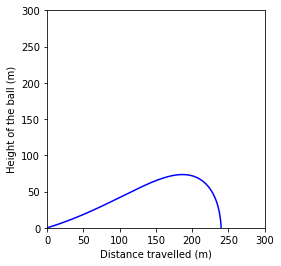

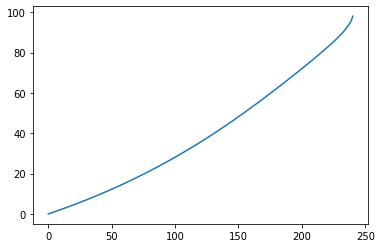

In [ ]:
#data 물리식에 넣기
import random

speed = random.randrange(14, 89)
angle = random.randrange(1, 25)
spin = random.randrange(2650, 6000)    #스핀량
spin_axis = random.randrange(-7, 7)    #스핀의 축 - magnus force가 달라짐
'''범위 수정'''
xz_theta = random.randrange(-5, 5)   #어느 방향으로 치는지(음수일 경우, 왼쪽 방향)

def data_loader(data_list):
  dict = {}
  list = []
  names = ['angle', 'speed', 'spin', 'spin_axis', 'xz_theta']
  for i in range(len(data_list)):
    list.append(data_list[i])
    #if data_list[i] == 90:
      #continue
    dict[names[i]] = list[i]
  #print(dict)
  return dict

golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
#print(golf_df)

#initial_velocity = 75    launch_angle = 17    spin_rate = 4283     spin_axis = -7     xz_theta = 12
#{'angle': 22, 'speed': 60, 'spin': 4508, 'spin_axis': 6, 'xz_theta': -3}
initial_velocity, launch_angle, spin_rate , spin_axis, xz_theta = 75, 17, 4283, -7, 12
print(spin_rate)
x_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[0]
y_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[1]
z_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[2]
print('vel',initial_velocity, 'angle', launch_angle, 'spin', spin_axis, 'spin_rate',spin_rate, xz_theta)
plt.xlim(0,300)
plt.ylim(0,300)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Distance travelled (m)')
plt.ylabel('Height of the ball (m)')

print("Distance travelled by dimpled ball with drag and lift :", x_values_lift_dimpled[-1], "m")
print("Height of the golf ball: ", np.max(y_values_lift_dimpled), "m")

#print(f'Real distance: {}m, Real Height: {pga_tour_average[idx][3]}m')

plt.plot(x_values_lift_dimpled, y_values_lift_dimpled, 'b')

'''figure 사이즈 조절 필요 !'''
plt.figure()
plt.plot(x_values_lift_dimpled, z_values_lift_dimpled)
plt.show()

{'angle': 11, 'speed': 42, 'spin': 4780, 'spin_axis': -5, 'xz_theta': 3}
4780
Distance travelled by dimpled ball with drag and lift : 112.71766939573858 m
Height of the golf ball:  10.584712062090878 m


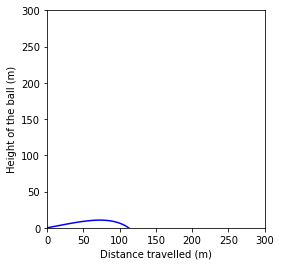

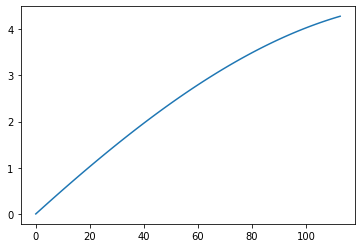

In [ ]:
#data 물리식에 넣기
import random

speed = random.randrange(14, 89)
angle = random.randrange(1, 25)
spin = random.randrange(2650, 6000)    #스핀량
spin_axis = random.randrange(-7, 7)    #스핀의 축 - magnus force가 달라짐
xz_theta = random.randrange(-5, 5)   #어느 방향으로 치는지(음수일 경우, 왼쪽 방향)

def data_loader(data_list):
  dict = {}
  list = []
  names = ['angle', 'speed', 'spin', 'spin_axis', 'xz_theta']
  for i in range(len(data_list)):
    list.append(data_list[i])
    #if data_list[i] == 90:
      #continue
    dict[names[i]] = list[i]
  #print(dict)
  return dict

golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
print(golf_df)

initial_velocity, launch_angle, spin_rate , spin_axis = golf_df['speed'], golf_df['angle'], golf_df['spin'], golf_df['spin_axis']
xz_theta = golf_df['xz_theta']

print(spin_rate)
x_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[0]
y_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[1]
z_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[2]
plt.xlim(0,300)
plt.ylim(0,300)
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel('Distance travelled (m)')
plt.ylabel('Height of the ball (m)')

print("Distance travelled by dimpled ball with drag and lift :", x_values_lift_dimpled[-1], "m")
print("Height of the golf ball: ", np.max(y_values_lift_dimpled), "m")

#print(f'Real distance: {}m, Real Height: {pga_tour_average[idx][3]}m')

plt.plot(x_values_lift_dimpled, y_values_lift_dimpled, 'b')

plt.figure()
plt.plot(x_values_lift_dimpled, z_values_lift_dimpled)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  if sys.path[0] == '':


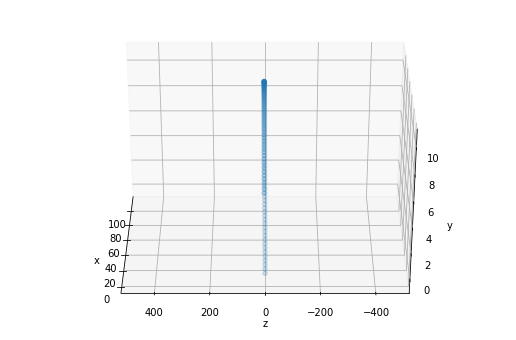

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111, projection='3d')
ax.view_init(30,180)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')

# z 축
ax.set_ylim(ymin= -500, ymax= 500)

ax.scatter(x_values_lift_dimpled, z_values_lift_dimpled, y_values_lift_dimpled, alpha=0.2)

In [ ]:
!mkdir train_luma

In [ ]:
rm -rf train_dataset

In [ ]:
#spin_rate까지 데이터셋에 추가
import random
count = 0
while True:
  speed = random.uniform(14, 89)
  angle = random.uniform(1, 25)
  spin = random.uniform(2650, 6000)
  spin_axis = random.uniform(-7, 7)
  xz_theta = random.uniform(-5, 5)

  golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
  #print(golf_df)

  initial_velocity, launch_angle, spin_rate , spin_axis, xz_theta = golf_df['speed'], golf_df['angle'], golf_df['spin'], golf_df['spin_axis'], golf_df['xz_theta']

  #print(spin_rate)
  x_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[0]
  y_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[1]
  #z_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[2]

  with open('/content/train_luma/set{}.txt'.format(count), 'a') as file:
    for x,y in zip(x_values_lift_dimpled[0:30], y_values_lift_dimpled[0:30]):
      #list.append((x,y))
      file.write('{},{},{}\n'.format(x,y,spin_rate))


  count += 1
  print(count)

  # 5000
  if count > 500:
    break

file.close()

In [ ]:
with open('/content/set0.txt','a') as file:
  for count in range(40):
    file.write('{},{},{}\n'.format(0.0, 0.0, spin_rate))


In [ ]:
import os

under_list = []
for i in range(count):
  with open('/content/train_dataset_10/set{}.txt'.format(i), 'r') as file:
    if (file.read().count('\n') + 1) < 10:
      #print(file)
      #file.write('{},{},{}'.format(0.0,0.0,spin_rate))
      under_list.append(i)

In [ ]:
print(under_list)
len(under_list)

[82, 123, 202, 234, 287, 403, 654, 785, 852, 875, 1005, 1039, 1075, 1134, 1192, 1193, 1271, 1348, 1352, 1445, 1613, 1643, 1697, 1825, 1834, 1837, 1894, 1936, 2001, 2007, 2063, 2145, 2192, 2351, 2445, 2706, 2745, 2823, 2869, 2899, 2914, 3093, 3106, 3314, 3330, 3620, 3667, 3744, 3754, 3866, 3892, 3916, 3972, 3994, 4035, 4094, 4195, 4204, 4230, 4356, 4431, 4447, 4471, 4523, 4562, 4718, 4761, 4801, 4882, 4975]


70

In [ ]:
spin_rate

4760.001697605247

In [ ]:
#10 미만인 파일들만 리스트로 뽑아서
for i in under_list:
  with open('/content/train_dataset_10/set{}.txt'.format(i), 'a') as file:
    file.write('{},{},{}\n'.format(0.0, 0.0,spin_rate))

# Dataset Making

In [ ]:
!mkdir train

In [ ]:
#spin_rate까지 데이터셋에 추가
import random
count = 0
while True:
  speed = random.uniform(14, 89)
  angle = random.uniform(1, 25)
  spin = random.uniform(2650, 6000)
  spin_axis = random.uniform(-7, 7)
  xz_theta = random.uniform(-5, 5)

  golf_df = data_loader([angle, speed, spin, spin_axis, xz_theta])
  #print(golf_df)

  initial_velocity, launch_angle, spin_rate , spin_axis, xz_theta = golf_df['speed'], golf_df['angle'], golf_df['spin'], golf_df['spin_axis'], golf_df['xz_theta']

  #print(spin_rate)
  x_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[0]
  y_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[1]
  #z_values_lift_dimpled = liftTrajectory(initial_velocity, launch_angle, xz_theta, spin_axis, spin_rate)[2]

  with open('/content/train/set{}.txt'.format(count), 'a') as file:
    for x,y in zip(x_values_lift_dimpled[0:30], y_values_lift_dimpled[0:30]):
      #list.append((x,y))
      file.write('{},{},{}\n'.format(x,y,spin_rate))


  count += 1
  print(count)

  # 5000
  if count > 5000:
    break

file.close()

Streaming output truncated to the last 5000 lines.
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265

# Embedding for under 10

In [ ]:
b

In [ ]:
under

[4, 17, 27, 29, 35, 39, 43, 44, 46, 49]

In [ ]:
data = pd.read_csv('/content/train/set4.txt')

In [ ]:
data

,0.0,0.0.1,2821.604635675268
0,0.659621,0.025264,2821.604636
1,1.316227,0.041160,2821.604636
2,1.969840,0.048996,2821.604636
3,2.620482,0.048753,2821.604636
4,3.268176,0.040410,2821.604636
5,3.912941,0.023946,2821.604636
6,4.554797,-0.000663,2821.604636


In [ ]:
import os

under = []
for i in range(count):
  with open('/content/train_kk/set{}.txt'.format(i), 'r') as file:
    if (file.read().count('\n') + 1) < 30:

      under.append(i)

In [ ]:
import csv

c = 0
for i in under:
  df = pd.read_csv('/content/train_new/set{}.txt'.format(i),
                      sep= ',', names = ['x', 'y', 'spin_rate'])

  while len(df) < 30:
    f = open('/content/train_new/set{}.txt'.format(i),'a', newline='')
    wr = csv.writer(f)
    wr.writerow([0.0, 0.0, df['spin_rate'][0]])

    df = pd.read_csv('/content/train_new/set{}.txt'.format(i),
                      sep= ',', names = ['x', 'y', 'spin_rate'])

    if len(df) > 30:
      break

In [ ]:
df = pd.read_csv('/content/train_new/set4.txt',
                 sep= ',', names = ['x', 'y', 'spin_rate'])

In [ ]:
df

,x,y,spin_rate
0,0.000000,0.000000,2821.604636
1,0.659621,0.025264,2821.604636
2,1.316227,0.041160,2821.604636
3,1.969840,0.048996,2821.604636
4,2.620482,0.048753,2821.604636
5,3.268176,0.040410,2821.604636
6,3.912941,0.023946,2821.604636
7,4.554797,-0.000663,2821.604636
8,0.000000,0.000000,2821.604636
9,0.000000,0.000000,2821.604636


In [ ]:
for i in under:
  df = pd.read_csv('/content/train_re/set{}.txt'.format(i),
                      sep= ',', names = ['x', 'y', 'spin_rate'])
  print(len(df))

  while len(df) < 30:
    f = open('/content/train_re/set{}.txt'.format(i),'a', newline='')
    wr = csv.writer(f)
    wr.writerow([0.0, 0.0, df['spin_rate'][0]])

    if len(df) > 30:
      continue

In [ ]:
data = pd.read_csv('/content/train_chri/set19.txt')

In [ ]:
data

,0.0,0.0.1,2870.6490749821323
0,1.166032,0.019411,2870.649075
1,2.324765,0.031377,2870.649075
2,3.476278,0.039118,2870.649075
3,4.620634,0.042591,2870.649075
4,5.757895,0.041756,2870.649075
5,6.888124,0.036571,2870.649075
6,8.011383,0.026991,2870.649075
7,9.127734,0.012975,2870.649075
8,10.237236,-0.005521,2870.649075
9,0.000000,0.000000,2870.649075


In [ ]:
import csv

c = 0

while True:

  for i in under:
    df = pd.read_csv('/content/train_chri/set{}.txt'.format(i),
                      sep= ',', names = ['x', 'y', 'spin_rate'])
    print(len(df))
    f = open('/content/train_luma/set{}.txt'.format(i),'a', newline='')
    #wr = csv.writer(f)
    #wr.writerow([0.0, 0.0, df['spin_rate'][0]])

    #if len(df) > 30:
      #continue

  c += 1
  if c > len(under):
    break

11
10
25
19
25
11
10
25
19
25
11
10
25
19
25
11
10
25
19
25
11
10
25
19
25
11
10
25
19
25


## Model, LSTM based Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
from torch.autograd import Variable

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [ ]:
#DATA PREPROCESSING
df = pd.read_csv('/content/train_dataset_10/set50.txt', sep= ',', names = ['x', 'y', 'spin_rate'])
print(df)
print(len(df))

           x         y    spin_rate
0   0.000000  0.000000  4929.667415
1   2.578422  1.006949  4929.667415
2   5.121227  2.009301  4929.667415
3   7.627542  3.018123  4929.667415
4  10.098146  4.032869  4929.667415
5  12.533802  5.052996  4929.667415
6  14.935252  6.077976  4929.667415
7  17.303215  7.107297  4929.667415
8  19.638393  8.140462  4929.667415
9  21.941480  9.177002  4929.667415
10


In [ ]:
import os

path = '/content/train_dataset_10'
for i in range(5000):
  file = 'set{}.txt'.format(i)
  file = os.path.join(path, file)
  #print(file)
  df = pd.read_csv(file, sep= ',', names = ['x', 'y', 'spin_rate'])
  #if len(df) < 30:
  #  print(file)

    #with open(file, 'a') as f:
     # f.write('{},{},{}\n'.format(0.0, 0.0, 0.0))
     # f.close

In [ ]:
file = '/content/train_dataset/set1014.txt'
with open(file, 'a') as f:
  file = pd.read_csv(file)
  for i in range(0, (30 - len(file))):
    f.write('{},{},{}\n'.format(0.0, 0.0, 0.0))
    f.close

In [ ]:
import os

path = '/content/train_dataset_10'
for i in range(5000):
  file = 'set{}.txt'.format(i)
  file = os.path.join(path, file)
  #print(file)
  df = pd.read_csv(file, sep= ',', names = ['x', 'y', 'spin_rate'])

In [ ]:
df.head(15)

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:, 2:3]
print(x.shape)
print(x[:500000])
print(y[:500000])

(10, 2)
           x         y
0   0.000000  0.000000
1   2.478002  0.544674
2   4.924552  1.087059
3   7.339902  1.636885
4   9.724720  2.193748
5  12.079659  2.757244
6  14.405352  3.326977
7  16.702414  3.902559
8  18.971442  4.483614
9  21.213011  5.069774
     spin_rate
0  4645.592824
1  4645.592824
2  4645.592824
3  4645.592824
4  4645.592824
5  4645.592824
6  4645.592824
7  4645.592824
8  4645.592824
9  4645.592824


In [ ]:
# x = (x, y) Y = spin_rate
x_train = x[:110140]
x_test = x[110140:]

y_train = y[:110140]
y_test = y[110140:]

print(x_train.shape, y_train.shape)

(110140, 2) (110140, 1)


In [ ]:
#padding - 0이 아닌것

In [ ]:
with open('/content/train_data.txt', 'r') as file:
  if num in file == 0.0:
    x_train = np.reshape(x_train, (x_train.shape[0],29, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 29, x_test.shape[1]))
    y_train = np.reshape(y_train, (y_train.shape[0], 29, y_train[1]))
    y_test = np.reshape(y_test, (y_test.shape[0], 29, y_test.reshape[1]))

    #파일 합치기 or 개별로 만들어서 읽게 하던가 or 잘라서 frame에 넣을 수 있도록 ?
    x_train = np.concat(x_train)
    x_test = np.concat(x_test)

In [ ]:
#x = [sample(batch_size), time step, features]
x_train = np.reshape(x_train, (x_train.shape[0],50, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 50, x_test.shape[1]))
y_train = np.reshape(y_train, (y_train.shape[0], 50, y_train[1]))
y_test = np.reshape(y_test, (y_test.shape[0], 50, y_test.reshape[1]))

ValueError: ignored

In [ ]:
x_train_tensors = Variable(torch.Tensor(x_train.values))
x_test_tensors = Variable(torch.Tensor(x_test.values))

y_train_tensors = Variable(torch.Tensor(y_train.values))
y_test_tensors = Variable(torch.Tensor(y_test.values))

x_train_tensors_final = torch.reshape(x_train_tensors,  (x_train_tensors.shape[0], 1, x_train_tensors.shape[1]))
x_test_tensors_final = torch.reshape(x_test_tensors,  (x_test_tensors.shape[0], 1, x_test_tensors.shape[1]))

print(x_train_tensors_final.shape, y_train_tensors.shape)

torch.Size([9000, 1, 2]) torch.Size([27000, 1])


In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

In [ ]:
class LSTM1(nn.Module):
  def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
    super(LSTM1, self).__init__()
    self.num_classes = num_classes #number of classes
    self.num_layers = num_layers #number of layers
    self.input_size = input_size #input size
    self.hidden_size = hidden_size #hidden state
    self.seq_length = seq_length #sequence length

    self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                      num_layers=num_layers, batch_first=True) #lstm
    self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
    self.fc = nn.Linear(128, num_classes) #fully connected last layer

    self.relu = nn.ReLU()

  def forward(self,x):
    h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #hidden state
    c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)).to(device) #internal state
    # Propagate input through LSTM

    output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state

    hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
    out = self.relu(hn)
    out = self.fc_1(out) #first Dense
    out = self.relu(out) #relu
    out = self.fc(out) #Final Output

    return out

In [ ]:
num_epochs = 3000
learning_rate = 0.00001
input_size = 1  #num of feature size
hidden_size = 1 #num of feature size in hidden layer
num_layers = 3

num_classes = 1

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # device
print(torch.cuda.get_device_name(0))

lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, x_train_tensors_final.shape[1]).to(device)
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate)

Tesla T4


In [ ]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(x_train_tensors_final.to(device))
  optimizer.zero_grad()

  #print(outputs.shape)
  #print(y_train_tensors.shape)
  loss = loss_function(outputs, y_train_tensors.to(device))

  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
    print('epoch: {}, loss: {}'.format(epoch, loss.item()))

epoch: 0, loss: 218.53713989257812
epoch: 100, loss: 217.7152557373047
epoch: 200, loss: 216.898681640625
epoch: 300, loss: 216.0873260498047
epoch: 400, loss: 215.2803497314453
epoch: 500, loss: 214.47763061523438
epoch: 600, loss: 213.6790313720703
epoch: 700, loss: 212.88323974609375
epoch: 800, loss: 212.08810424804688
epoch: 900, loss: 211.29647827148438
epoch: 1000, loss: 210.50926208496094
epoch: 1100, loss: 209.7259521484375
epoch: 1200, loss: 208.94639587402344
epoch: 1300, loss: 208.17047119140625
epoch: 1400, loss: 207.3980255126953
epoch: 1500, loss: 206.62899780273438
epoch: 1600, loss: 205.86329650878906
epoch: 1700, loss: 205.100830078125
epoch: 1800, loss: 204.341552734375
epoch: 1900, loss: 203.5853729248047
epoch: 2000, loss: 202.8321990966797
epoch: 2100, loss: 202.08200073242188
epoch: 2200, loss: 201.3343505859375
epoch: 2300, loss: 200.5882568359375
epoch: 2400, loss: 199.84510803222656
epoch: 2500, loss: 199.10470581054688
epoch: 2600, loss: 198.3669891357422
epo